In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [63]:
n = 16432

In [64]:
a = np.zeros(n)

In [65]:
f = open("plo_preflop_hs.txt", "r")
for i in range(n):
    strng = f.readline().split(" ")
    a[i] = float(strng[1][:-1])
f.close()

Text(0.5, 1.0, 'Preflop HandStrength over all possible starting hands')

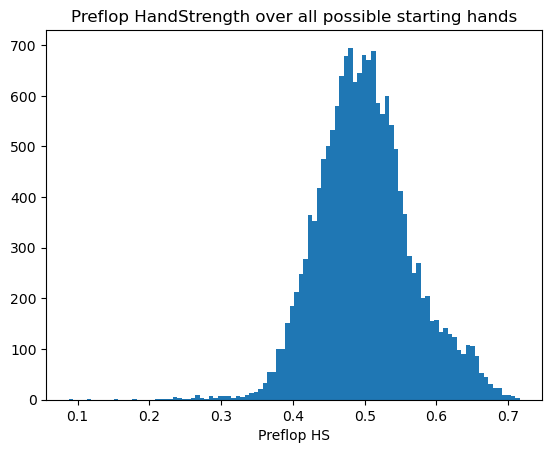

In [67]:
plt.hist(a, bins=100, density=False)
plt.xlabel("Preflop HS")
plt.title("Preflop HandStrength over all possible starting hands")

In [68]:
np.mean(a)

0.5006008884250244

In [69]:
np.quantile(a, 0.001)

0.24116579700000002

In [70]:
sorted(a)[55]

0.299123

In [71]:
flops = []
flop_names = []
for i in range(200):
    filenm = "flops"+str(i)+".txt"
    x = []
    j = 0
    with open(filenm) as openfileobject:
        for line in openfileobject:
            j += 1
            if(j==1):
                continue
            elif(j==2):
                flop_names.append(line)
                continue
            x.append(float(line.split(" ")[1][:-1]))
    flops.append(x)

Text(0.5, 1.0, 'Postflop HandStrength distribution on the flop 3-2 3-3 7-2\n')

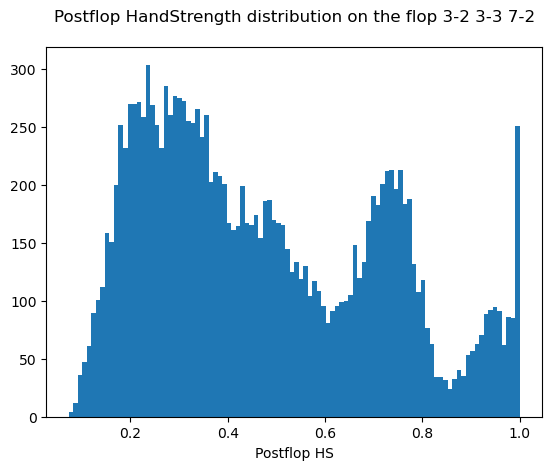

In [72]:
ind = 6
plt.hist(flops[ind], bins=100, density=False)
plt.xlabel("Postflop HS")
plt.title("Postflop HandStrength distribution on the flop "+flop_names[ind])

In [73]:
np.quantile(flops[ind], 0.993)

0.995833

In [74]:
quantiles = []
for i in range(200):
    quantiles.append(np.quantile(flops[i], 0.005))

In [75]:
np.min(quantiles)

0.040129177

In [76]:
np.min(flops[ind])

0.07375

In [77]:
nr_buckets = 10

In [78]:
trans_mat = np.zeros((nr_buckets, nr_buckets))

In [79]:
f = open("postflop_buckets_matrix.txt", "r")
for i in range(nr_buckets):
    strng = f.readline().split(" ")
    for j in range(nr_buckets):
        trans_mat[i][j] = float(strng[j])

In [80]:
f.close()

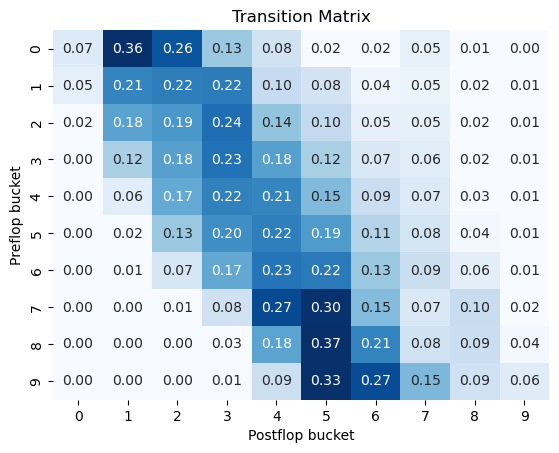

In [101]:
ax = sns.heatmap(trans_mat, annot=True, fmt=".2f", cmap="Blues", cbar=False, vmin=0.03, vmax=0.3)
ax.set(xlabel='Postflop bucket', ylabel='Preflop bucket', title="Transition Matrix")
# Step 3: Display the plot
plt.show()

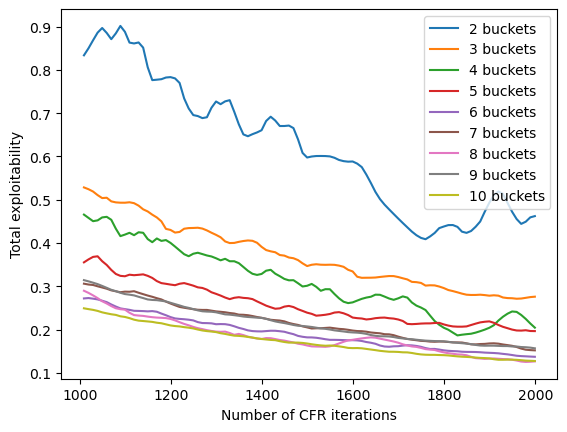

In [109]:
for i in range(2, 11):
    f = open(str(i)+"buckets.txt", "r")
    x = []
    y = []
    for j in range(200):
        strng = f.readline().split(" ")
        x.append(int(strng[0]))
        y.append(float(strng[1][:-1]))
    f.close()
    plt.plot(x[100:], y[100:], label = str(i)+" buckets")
plt.legend()
plt.xlabel("Number of CFR iterations")
plt.ylabel("Total exploitability")
plt.show()

In [113]:
time_to_run = [12, 51, 160, 422, 13*60+50, 26*60+47, 54*60+36, 91*60+9, 130*60+59]
xaxis = np.array(range(2, 11))

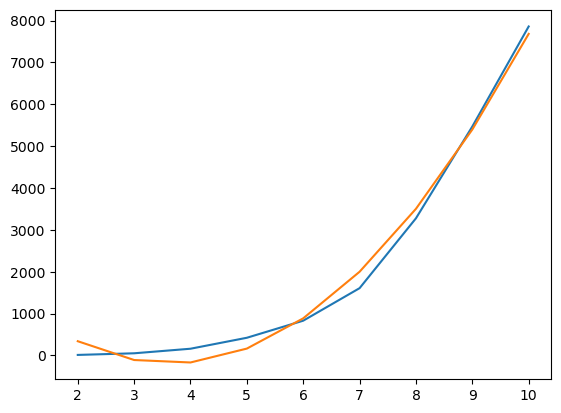

In [127]:
plt.plot(xaxis, time_to_run)
plt.plot(xaxis, 195.3*xaxis**2-1425.8*xaxis+2409.9)

In [126]:
time_to_run

[12, 51, 160, 422, 830, 1607, 3276, 5469, 7859]

In [128]:
game_value = np.array([0.43, 0.45, 0.61, 0.64, 0.85, 0.63, 0.82, 0.84, 0.78])

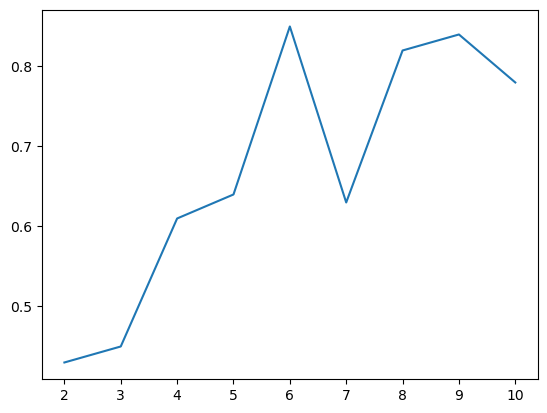

In [129]:
plt.plot(xaxis, game_value)